In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

import ipywidgets

### your other options
# pd.set_option('display.max_rows', 50)
# pd.set_option('max_colwidth', None)
# pd.set_option('max_columns', None)

# pd.reset_option('display.max_rows')

# !pip install ipywidgets



# Get Data, EDA

In [197]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Basic Exploration
1. 891 rows, 12 columns ie 891 people, 12 variables about each person

2. Columns Looking at the Kaggle Site
    1. Survived" column, 1 = Yes, 0 = No
    2. pclass: ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
    3. sex: male or female
    4. age: in years
    5. sibsp: # of siblings or spouses aboard the Titanic
    6. parch: # of parents or children aboard the Titanic
    7. ticket: ticket number
    8. fare: passenger fare
    9. cabin: cabin number
    10. embarked: port of embarkation, C = Cherbourg, Q = Queenston, S = Southampton
    11. PassengerId
    12. Name


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


test data has 418 rows but 11 columns because 'Survived' is the class we are trying to predict

In [6]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### The gender submission is an example of what the submission file should look like. The reason why it is called gender is because this result was created by assuming that any female in the TEST set would survive 

## Exploring the training dataset

<AxesSubplot:ylabel='Frequency'>

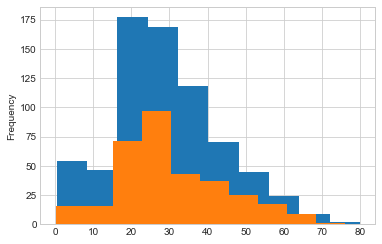

In [7]:
train.Age.plot.hist()
test.Age.plot.hist()

<AxesSubplot:>

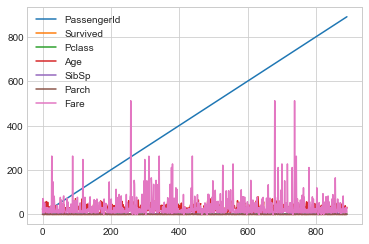

In [8]:
train.plot()

## Looking for missing values

<AxesSubplot:>

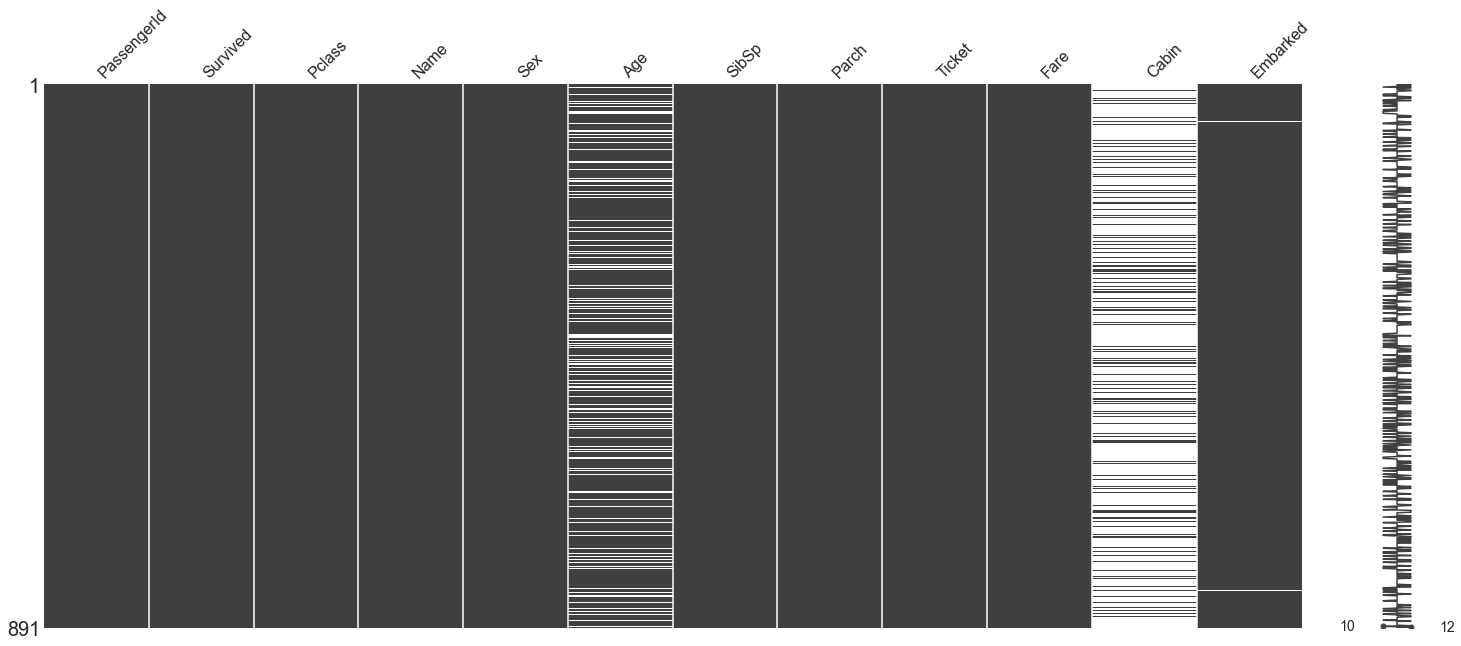

In [9]:
missingno.matrix(train)

In [10]:
train.isnull().sum() # get null counts of all columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# print(train.Age.describe()) 
print(train.Cabin.describe()) # get counts for specific column


count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object


1. We can see that Age and Cabin has a lot of missing data. We can double check using describe to see the count. There are 891 rows but there are only 714 counted. So 177 rows missing

2. Cabin might not even be worth it to check on seeing how there almost no data

## Creating 2 empty dataframes
1 for continuous values, the other for DISCRETIZED continuous values

In [12]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

## Looking at the datatypes in the df

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Looking through each column/feature

### Target Feature: Survived

0    549
1    342
Name: Survived, dtype: int64


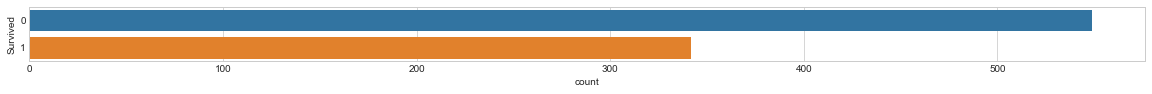

In [14]:
fig = plt.figure(figsize = (20,1))
sns.countplot(y='Survived', data= train)
print(train.Survived.value_counts())

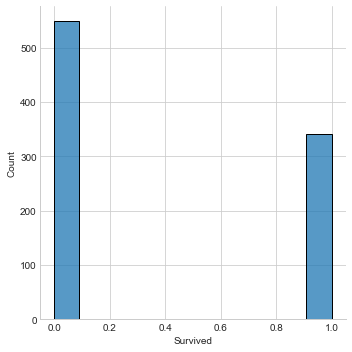

In [15]:
sns.displot(train, x = 'Survived')

### this is not a good way to plot the Survived variabel
1. It should be categorical: 1 = Survived, 0 = died
2. Its not clear to people

convert Survived to boolean would be better

no     549
yes    342
Name: s2, dtype: int64


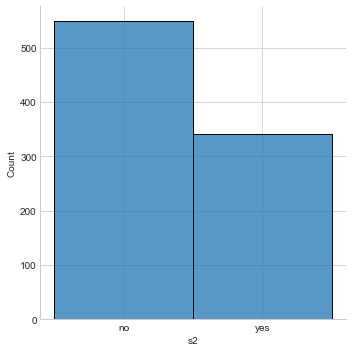

In [16]:
# train['s2'] = train['Survived'].apply(lambda x: 'yes' if x==1 else 'no')
train['s2'] = train['Survived'].map({True:'yes', False:'no'})

print(train['s2'].value_counts())
sns.displot(train, x = 's2')

In [17]:
# add to our dfs
# df_bin['Survived'] = train['s2']
# df_con['Survived'] = train['s2']

df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

## Feature exploration: CPNS
1. Plot: is it discrete or continuous?
2. Check null values
3. Check the counts
4. Summary stats if needed

## Feature: Pclass
ticket class of passenger

1 = 1st, 2 = 2nd, 3 = 3rd

plot first

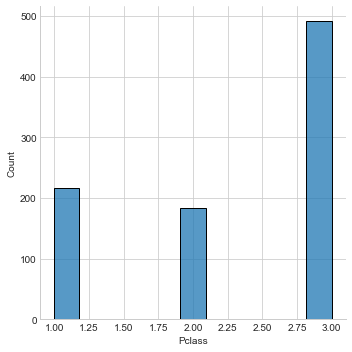

In [18]:
sns.displot(train.Pclass)

In [19]:
train.Pclass.isnull().sum() # no null vals

0

In [20]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

no missing vals so lets add it to our sub dataframes

In [21]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

## Feature: Name
name of passenger
1. doesnt make sense to plot names

In [22]:
# sns.displot(train.Name) # does not make sense to plot

In [23]:
train.Name.isnull().sum()

0

In [24]:
print(train.Name.value_counts())
print(train.Name.describe()) # 891 unique values

Myhrman, Mr. Pehr Fabian Oliver Malkolm             1
Farrell, Mr. James                                  1
Zabour, Miss. Hileni                                1
Troutt, Miss. Edwina Celia "Winnie"                 1
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")    1
                                                   ..
Foo, Mr. Choong                                     1
O'Brien, Mr. Thomas                                 1
Lahoud, Mr. Sarkis                                  1
Yasbeck, Mr. Antoni                                 1
Staneff, Mr. Ivan                                   1
Name: Name, Length: 891, dtype: int64
count                                         891
unique                                        891
top       Myhrman, Mr. Pehr Fabian Oliver Malkolm
freq                                            1
Name: Name, dtype: object


- Every passenger has a unique name
- We can reduce the differences by removing Miss, Mrs or Mr since we already have Sex
- too many values, so we wont include this in our dataframes

## Feature: Sex
- Male of Female

<AxesSubplot:xlabel='Sex', ylabel='count'>

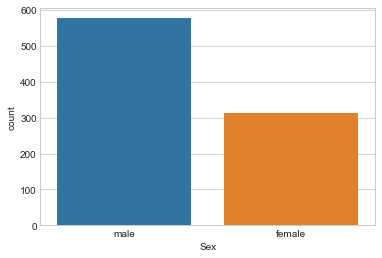

In [25]:
sns.countplot(x='Sex', data=train)

In [26]:
train.Sex.isnull().sum()

0

In [27]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
train['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [29]:
# add to df
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male, 1 for female

df_con['Sex'] = train['Sex']

## It seems like dbourke likes to change the discrete variables to int. Might be because later when we are training the model, numbers are more easier to process.

In [30]:
df_bin['Sex']
df_con['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

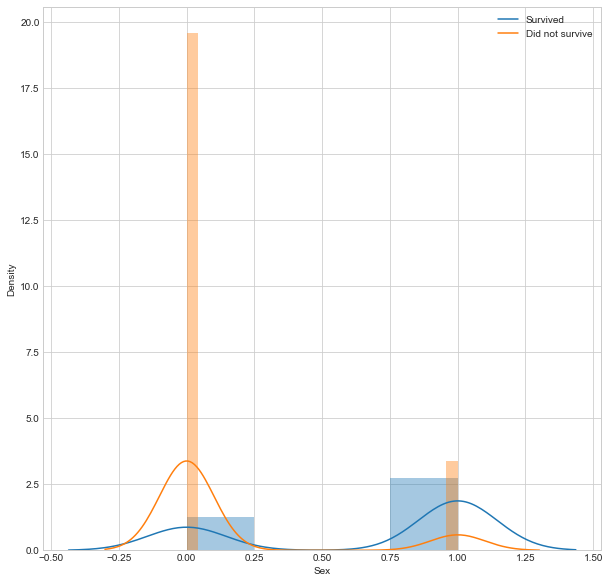

In [31]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})

plt.legend() # legend to see the legend
plt.show()

1. Not many ppl survived
2. Of those that did, more were female (because sex == 1 means female)

## Feature: Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

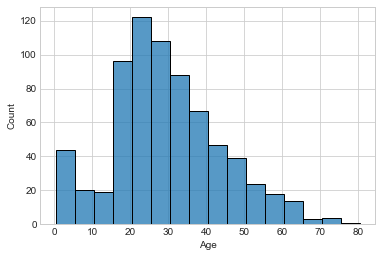

In [32]:
sns.histplot(data=train, x='Age', binwidth=5)

In [33]:
train.Age.isnull().sum()

177

In [34]:
# train.Age.value_counts() # not useful because numeric
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

1. 177/891 rows missing almost 25%
2. what to do?
    a. remove the rows
    b. replace with the mean (30)
    

In [35]:
train['Age'] = train['Age'].fillna(value= 30)
train.Age.isnull().sum()

0

In [36]:
train['Age'] = train['Age'].astype(int)
train['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [37]:

# Once the Age values have been fixed up, we can add them to our sub dataframes.
df_bin['Age'] = pd.cut(train['Age'], 8) # bucketed/binned into different categories
df_con['Age'] = train['Age'] # non-bucketed

In [38]:
df_bin.Age.value_counts() # has a (-0.08, 10.0) bin?

train.Age.describe() # min is 0 max is 80 which makes sense
# the bin is just weird

count    891.000000
mean      29.742985
std       13.011583
min        0.000000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### function to create count and distribution visualisations
- since we've been repeating ourselves alot

In [39]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
        plt.legend()
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

        plt.legend()


## Feature: SibSp
- number of sibling or spouses the passenger has on the titanic

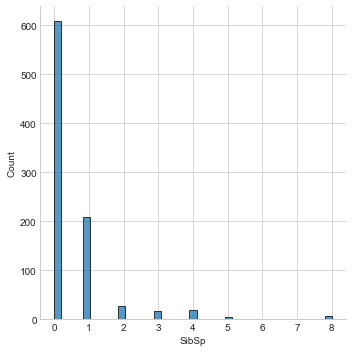

In [40]:
sns.displot(data = train, x = 'SibSp')

In [41]:
def cns(data, target_column):
    """
    function that
    1. COUNTS: get the value_counts of the target col
    2. NULLS: checks the amount of nulls in the col
    3. Stats: Check the stats of the columns
    """
    print('----------------------------')
    print(data[target_column].value_counts())

    print('----------------------------')
    print('NUMBER OF NULLS: ' + str(train[target_column].isnull().sum()))

    print('----------------------------')
    print(train[target_column].describe())


In [42]:
cns(train, 'SibSp')

----------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----------------------------
NUMBER OF NULLS: 0
----------------------------
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


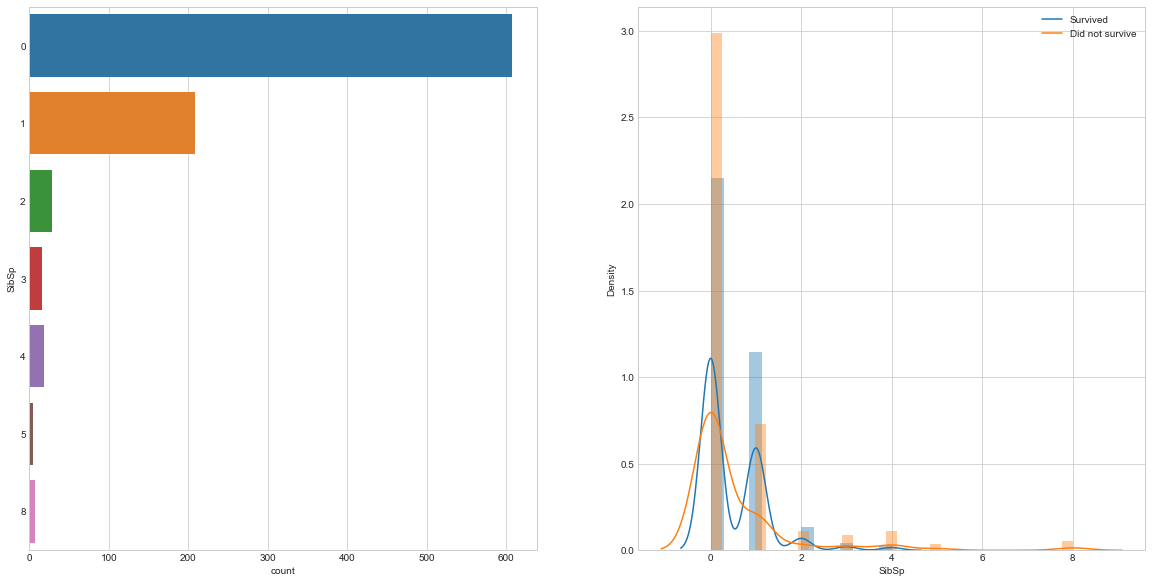

In [43]:
plot_count_dist(train,
                bin_df = df_bin,
                label_column = 'Survived',
                target_column = 'SibSp',
                figsize = (20,10)
)

1. Those with 1 sibling or spouse on the titanic is more likely to survive. This might most likely be because if you were a couple, one of them would more likely be saved (husband lets the wife get on the safety boat)

2. Overall most people are alone on the ship, and its not surpsising that the most of them in that group are both alive and dead

In [44]:
df_con['SibSp'] = train['SibSp']
df_bin['SibSp'] = train['SibSp']

## Feature: Parch
- Number of parents / children the passenger has on the titanic
- similar to SibSp, 

In [45]:
cns(train, 'Parch')

----------------------------
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
----------------------------
NUMBER OF NULLS: 0
----------------------------
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


In [46]:
def plot_count_distv2(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize = figsize)

        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
        plt.legend()
    else:
        # fig = plt.figure(figsize=figsize)
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize = figsize)
        # plt.subplot(1, 2, 1)
        sns.countplot( y=target_column, data=data, ax = axs[0])
        # sns.distplot(data.loc[data[label_column] == 1][target_column], 
        #              kde_kws={"label": "Survived"});
        # sns.distplot(data.loc[data[label_column] == 0][target_column], 
        #              kde_kws={"label": "Did not survive"});
        # plt.subplot(1, 2, 2)
        sns.histplot(data=train,
                    x = target_column,
                    kde=True,
                    multiple='dodge',
                    hue= label_column,
                    ax = axs[1],
                    stat = 'count'
                    )
        plt.legend()


No handles with labels found to put in legend.


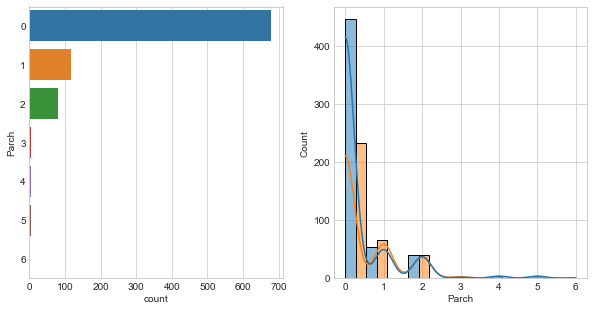

In [47]:
plot_count_distv2(train,
                bin_df = df_bin,
                label_column='Survived',
                target_column='Parch',
                figsize=(10,5),                
                )

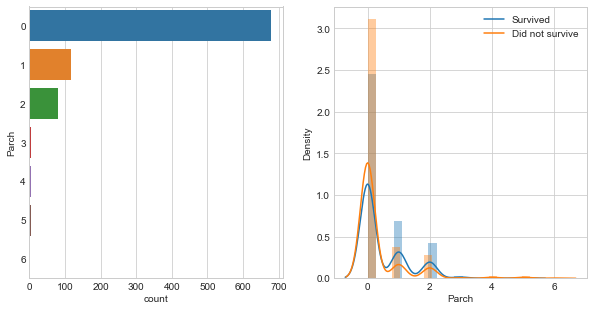

In [48]:
plot_count_dist(train,
                bin_df = df_bin,
                label_column='Survived',
                target_column='Parch',
                figsize=(10,5),                
                )

### what does this show about Parch?
1. Most did not have any parents or children on the ship with them
2. of those that had at 1 o 2, more from that group survived than died. Might be because they are more likely to save children? 

In [49]:
## adding to our subset dataframes

df_con['Parch'] = train['Parch']
df_bin['Parch'] = train['Parch']

## Feature: Ticket
- ticket number of the passenger
- doubt theres anything useful from this, but lets see 

In [50]:
cns(data = train, target_column='Ticket')

----------------------------
1601                 7
CA. 2343             7
347082               7
CA 2144              6
347088               6
                    ..
Fa 265302            1
STON/O 2. 3101289    1
349242               1
349247               1
29751                1
Name: Ticket, Length: 681, dtype: int64
----------------------------
NUMBER OF NULLS: 0
----------------------------
count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object


- Unique count of 681, might be bad to do countplot

<AxesSubplot:xlabel='count', ylabel='Ticket'>

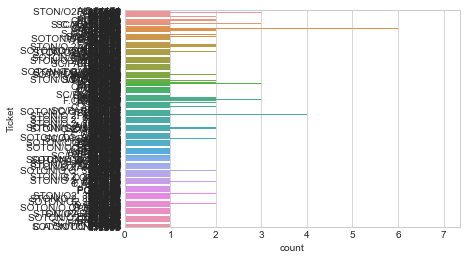

In [51]:
sns.countplot(data = train, y = 'Ticket') # ugly and takes awhile to plot

### How to reduce the ticket feature?
- Not sure really. But supposedly the hint is similar to reducing Name
- I guess you can try to remove the other strings and only filter by numbers, and then to reduce it even further, separate into buckets

## Feature: Fare
- How much the ticket costs


In [52]:
cns(data=train, target_column='Fare')

----------------------------
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64
----------------------------
NUMBER OF NULLS: 0
----------------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


- Again, alot of unique values so would be bad to plot

<AxesSubplot:xlabel='Fare', ylabel='count'>

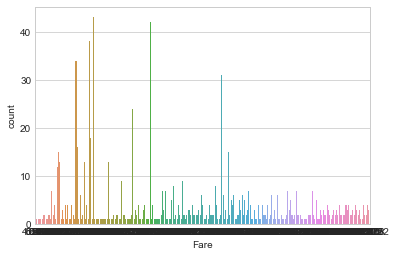

In [53]:
sns.countplot(data = train, x = 'Fare')

In [54]:
train.Fare.dtype

dtype('float64')

- Fare is a float, so lets add it to our continuous df
- categorise them into buckets to add to df_bin

In [55]:
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], 5)

In [56]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [57]:
### looking at the discretized fare stats!

cns(data=df_bin, target_column='Fare')

----------------------------
(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64
----------------------------
NUMBER OF NULLS: 0
----------------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


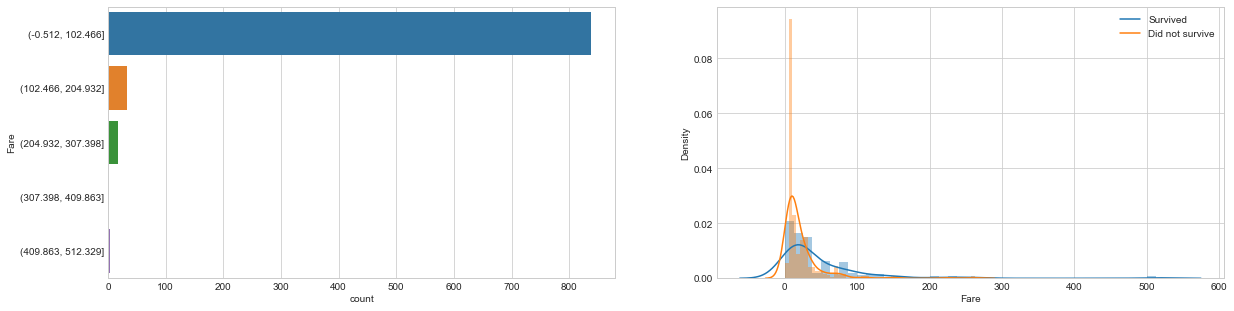

In [58]:
plot_count_dist(data=train,
            bin_df=df_bin,
            label_column='Survived',
            target_column='Fare',
            use_bin_df=True,               
                )

No handles with labels found to put in legend.


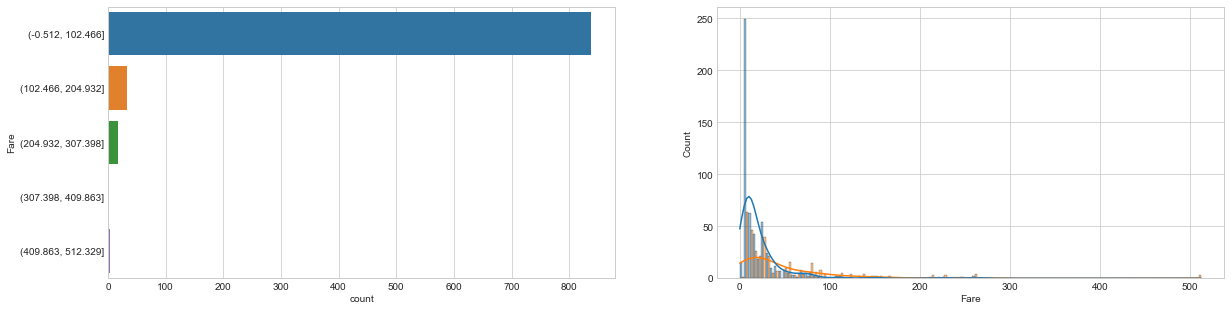

In [59]:
### still displaying bad weird graphs

plot_count_distv2(data=df_bin,
            bin_df=df_bin,
            label_column='Survived',
            target_column='Fare',
            # use_bin_df=True
                )

### How would you change the Fare bins?
- Looking at the value_counts(), we can see that the majority of the passengers are in one group; might be better to split into groups of 10?

## Feature: Cabin

In [60]:
cns(data=train, target_column='Cabin')

----------------------------
G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
              ..
E49            1
B42            1
C46            1
B69            1
D10 D12        1
Name: Cabin, Length: 147, dtype: int64
----------------------------
NUMBER OF NULLS: 687
----------------------------
count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object


<AxesSubplot:xlabel='Cabin', ylabel='count'>

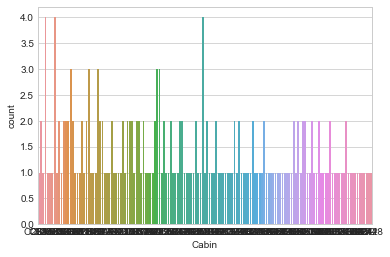

In [61]:
sns.countplot(data = train, x = 'Cabin')

In [62]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

1. Cabin has too many null values so we wont use it
2. How do we fill up these values though?

In [63]:
print(train.Cabin.unique())
print(train.Cabin.value_counts())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
G6             4
C23 C25 C27    4
B96 B98  

- Seeing that there isnt a very strong bias towards a certain ticket, it doesnt make sense to assign the null values to the median ie C23, C25, C27. But if no choice, then do that

## Feature: Embarked
- Port where the passenger boarded the Titanic
- Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [64]:
cns(data=train, target_column = 'Embarked')

----------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
----------------------------
NUMBER OF NULLS: 2
----------------------------
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


- Reading up on its voyage. The titanic went: Southampton -> Cherbourg -> Queenstown, which kinda makes sense
- most would embark on the maiden voyage

<AxesSubplot:xlabel='Embarked', ylabel='count'>

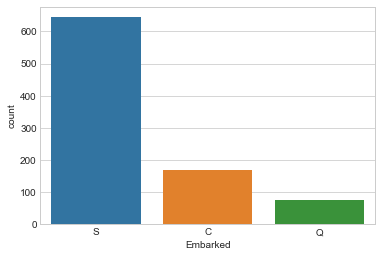

In [65]:
sns.countplot(data=train, x='Embarked')

### Embarked has 2 null vals
1. We could either drop or assign a val to these rows
2. Naiively, i would assign to S. Otherwise, we could do a random assignment
3. For now, we will dorp

In [66]:
%config Completer.use_jedi = False

In [67]:
# add to our dfs
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [68]:
print(len(df_bin))

df_con = df_con.dropna(subset = ['Embarked'])
df_bin = df_bin.dropna(subset = ['Embarked'])

print(len(df_bin))


891
889


# Feature Encoding
- We have our sub dataframes, now we encode features where they are ready to be used by our machine learning models
1. Encode our binned dataframe (df_bin) with one hot encoding
2. Encode our continuous dataframe (df_con) USING OneHotEncoder from sklearn
* kinda the same as pd.get_dummies, but try it out instead. More info about the differences (here)[https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki]. Long story short, OneHotEncoder if you are preprocessing for machine learning models.

In [69]:
df_bin

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,"(20.0, 30.0]",1,0,"(-0.512, 102.466]",S
1,1,1,1,"(30.0, 40.0]",1,0,"(-0.512, 102.466]",C
2,1,3,1,"(20.0, 30.0]",0,0,"(-0.512, 102.466]",S
3,1,1,1,"(30.0, 40.0]",1,0,"(-0.512, 102.466]",S
4,0,3,0,"(30.0, 40.0]",0,0,"(-0.512, 102.466]",S
...,...,...,...,...,...,...,...,...
886,0,2,0,"(20.0, 30.0]",0,0,"(-0.512, 102.466]",S
887,1,1,1,"(10.0, 20.0]",0,0,"(-0.512, 102.466]",S
888,0,3,1,"(20.0, 30.0]",1,2,"(-0.512, 102.466]",S
889,1,1,0,"(20.0, 30.0]",0,0,"(-0.512, 102.466]",C


In [70]:
# one hot encoding for binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(-0.08, 10.0]","Age_(10.0, 20.0]","Age_(20.0, 30.0]","Age_(30.0, 40.0]",...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [71]:
# df_bin_enc.columns 

### OneHotEncoder

In [72]:
df_con

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,30,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df_con).toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [74]:
from sklearn.compose import make_column_transformer


In [75]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex','Embarked', 'Pclass']),
    remainder = 'passthrough',
)

In [76]:
column_trans.fit_transform(df_con)

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [77]:
from sklearn.pipeline import make_pipeline

In [78]:
pipe = make_pipeline(column_trans)

### The only issue with this is that it becomes an array: you dk what are the column names
- revert to pd.get_dummies() for now

In [79]:
## testing ##
pd.get_dummies(df_con['Embarked'], # returns a dataframe with readable cols vs an array
    prefix='embarked') 

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [80]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_pclass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')


In [81]:
## combine all the new columns to df_con
df_con_enc = pd.concat([
    df_con,
    df_embarked_one_hot,
    df_sex_one_hot,
    df_pclass_one_hot,
], axis = 1)

## drop redundant columns
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)


In [82]:
df_con_enc

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,19,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,30,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26,0,0,30.0000,1,0,0,0,1,1,0,0


## Build machine learning models
1. Data has been converted to numbers, we can start training
2. Need to separate into train and test set

### Selecting the data

In [83]:
# select the df u wanna use
selected_df = df_con_enc

In [84]:
selected_df.head()

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35,0,0,8.0500,0,0,1,0,1,0,0,1


In [85]:
# split into features (X) and label (y)
X_train = selected_df.drop(['Survived'], axis = 1)
y_train = selected_df.Survived

In [86]:
print(X_train.shape)
print(y_train.shape)

(889, 12)
(889,)


## Defining a function to fit (train) our ml models
- since most of the models from sklearn, we can reuse the same functions most of the time. Let's not repeat ourselves

In [87]:
# function that runs the requested algo and returns the accuracy metrics
# also prints out the stats
# also prints out the run time

def fit_ml_algo(algo, X_train, y_train, cv):
    start_time = time.time()

    # one pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)

    # Cross validation
    y_pred = model_selection.cross_val_predict(algo,
                                            X_train,
                                            y_train,
                                            cv=cv,
                                            n_jobs = -1)
    
    # cross val accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, y_pred=y_pred)* 100, 2)

    time_taken = (time.time() - start_time)
    print(algo)
    print("Accuracy: %s" % acc)
    print("Accuracy cv 10-fold: %s" % acc_cv)
    print("run time: %s" % datetime.timedelta(seconds = time_taken))

    return y_pred, acc, acc_cv

## Logistic Regression

In [88]:
# start_time = time.time()

log_reg = LogisticRegression()

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(log_reg,
X_train,
y_train,
cv=10)

# log_time = (time.time() - start_time)
# print("run time: %s" % datetime.timedelta(seconds = log_time))

LogisticRegression()
Accuracy: 80.43
Accuracy cv 10-fold: 79.98
run time: 0:00:03.248071


## K Nearest Neighbours

In [89]:
start_time = time.time()

knn = KNeighborsClassifier()

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(knn,
                                                X_train,
                                                y_train,
                                                cv=10)

# knn_time = (time.time() - start_time)
# print("run time: %s" % datetime.timedelta(seconds = knn_time))

KNeighborsClassifier()
Accuracy: 81.66
Accuracy cv 10-fold: 70.75
run time: 0:00:00.168397


## Gaussian Naiive Bayes

In [90]:
gnb = GaussianNB()

train_pred_gnb, acc_gnb, acc_cv_gnb = fit_ml_algo(gnb,
                                                X_train,
                                                y_train,
                                                cv=10)

GaussianNB()
Accuracy: 78.52
Accuracy cv 10-fold: 78.4
run time: 0:00:00.044880


## Linear Support Vector Machine (aka support vector classifier)

In [91]:
linear_svc = LinearSVC()

train_pred_linear_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(linear_svc,
                                                X_train,
                                                y_train,
                                                cv=10)

LinearSVC()
Accuracy: 79.08
Accuracy cv 10-fold: 76.83
run time: 0:00:00.137860


## Stochastic Gradient Descent

In [92]:
sgd = SGDClassifier()

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(sgd,
                                                X_train,
                                                y_train,
                                                cv=10)

SGDClassifier()
Accuracy: 67.38
Accuracy cv 10-fold: 68.17
run time: 0:00:00.050879


## Decision Trees

In [93]:
dt = DecisionTreeClassifier()

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(dt,
                                                X_train,
                                                y_train,
                                                cv=10)

DecisionTreeClassifier()
Accuracy: 97.86
Accuracy cv 10-fold: 78.29
run time: 0:00:00.067818


## Gradient Boost Trees
- Highest one of the sklearn models

In [94]:
gbt = GradientBoostingClassifier()

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(gbt,
                                                X_train,
                                                y_train,
                                                cv=10)

GradientBoostingClassifier()
Accuracy: 89.65
Accuracy cv 10-fold: 82.23
run time: 0:00:00.404186


## CatBoost Algorithm
- A state of the art open source gradient boosting on decision trees library
- simple to use. Dbourkes go-to for any ml task
- catboost docs: https://catboost.ai/

In [95]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,35,1,0,53.1000,0,0,1,1,0,1,0,0
4,35,0,0,8.0500,0,0,1,0,1,0,0,1


In [96]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [97]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features # 3 is not inside because col 3 is fare, which is continuous and NOT categorical

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [98]:
# use CatBoost Pool() to pool together the training data and categorcial feature labels

train_pool = Pool(X_train,
                    y_train,
                    cat_features)

In [99]:
# instantiate the module
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss = ['Accuracy'],
                                    loss_function = 'Logloss')



In [100]:
catboost_model.fit(train_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6865149	total: 164ms	remaining: 2m 44s
1:	learn: 0.6808094	total: 190ms	remaining: 1m 34s
2:	learn: 0.6755095	total: 229ms	remaining: 1m 16s
3:	learn: 0.6720507	total: 237ms	remaining: 59s
4:	learn: 0.6667084	total: 259ms	remaining: 51.5s
5:	learn: 0.6623282	total: 277ms	remaining: 45.9s
6:	learn: 0.6574390	total: 294ms	remaining: 41.7s
7:	learn: 0.6540734	total: 306ms	remaining: 37.9s
8:	learn: 0.6493973	total: 314ms	remaining: 34.6s
9:	learn: 0.6443956	total: 331ms	remaining: 32.8s
10:	learn: 0.6397858	total: 361ms	remaining: 32.5s
11:	learn: 0.6350111	total: 378ms	remaining: 31.1s
12:	learn: 0.6298100	total: 396ms	remaining: 30.1s
13:	learn: 0.6247848	total: 413ms	remaining: 29.1s
14:	learn: 0.6197236	total: 434ms	remaining: 28.5s
15:	learn: 0.6160961	total: 455ms	remaining: 28s
16:	learn: 0.6115428	total: 473ms	remaining: 27.4s
17:	learn: 0.6076905	total: 488ms	remaining: 26.6s
18:	learn: 0.6047138	total: 505ms	remaining: 26.1s
19:	learn: 0

165:	learn: 0.4187046	total: 3.63s	remaining: 18.2s
166:	learn: 0.4181305	total: 3.66s	remaining: 18.2s
167:	learn: 0.4175943	total: 3.67s	remaining: 18.2s
168:	learn: 0.4172697	total: 3.69s	remaining: 18.2s
169:	learn: 0.4170558	total: 3.72s	remaining: 18.2s
170:	learn: 0.4166153	total: 3.74s	remaining: 18.1s
171:	learn: 0.4164900	total: 3.75s	remaining: 18s
172:	learn: 0.4163299	total: 3.76s	remaining: 18s
173:	learn: 0.4160946	total: 3.78s	remaining: 17.9s
174:	learn: 0.4156892	total: 3.83s	remaining: 18s
175:	learn: 0.4153484	total: 3.85s	remaining: 18s
176:	learn: 0.4153336	total: 3.85s	remaining: 17.9s
177:	learn: 0.4149374	total: 3.87s	remaining: 17.9s
178:	learn: 0.4149231	total: 3.89s	remaining: 17.8s
179:	learn: 0.4147983	total: 3.9s	remaining: 17.8s
180:	learn: 0.4145994	total: 3.92s	remaining: 17.7s
181:	learn: 0.4143122	total: 3.94s	remaining: 17.7s
182:	learn: 0.4138290	total: 3.95s	remaining: 17.7s
183:	learn: 0.4133374	total: 3.97s	remaining: 17.6s
184:	learn: 0.4127999

325:	learn: 0.3804815	total: 7.1s	remaining: 14.7s
326:	learn: 0.3804302	total: 7.13s	remaining: 14.7s
327:	learn: 0.3804296	total: 7.13s	remaining: 14.6s
328:	learn: 0.3801459	total: 7.16s	remaining: 14.6s
329:	learn: 0.3799405	total: 7.19s	remaining: 14.6s
330:	learn: 0.3797311	total: 7.21s	remaining: 14.6s
331:	learn: 0.3793966	total: 7.25s	remaining: 14.6s
332:	learn: 0.3792044	total: 7.27s	remaining: 14.6s
333:	learn: 0.3791646	total: 7.29s	remaining: 14.5s
334:	learn: 0.3790070	total: 7.32s	remaining: 14.5s
335:	learn: 0.3787664	total: 7.34s	remaining: 14.5s
336:	learn: 0.3786131	total: 7.36s	remaining: 14.5s
337:	learn: 0.3786127	total: 7.36s	remaining: 14.4s
338:	learn: 0.3784798	total: 7.39s	remaining: 14.4s
339:	learn: 0.3782861	total: 7.41s	remaining: 14.4s
340:	learn: 0.3782288	total: 7.42s	remaining: 14.3s
341:	learn: 0.3779316	total: 7.44s	remaining: 14.3s
342:	learn: 0.3778454	total: 7.46s	remaining: 14.3s
343:	learn: 0.3777399	total: 7.48s	remaining: 14.3s
344:	learn: 0

485:	learn: 0.3567025	total: 10.9s	remaining: 11.5s
486:	learn: 0.3566065	total: 10.9s	remaining: 11.5s
487:	learn: 0.3565667	total: 10.9s	remaining: 11.5s
488:	learn: 0.3564459	total: 11s	remaining: 11.4s
489:	learn: 0.3561401	total: 11s	remaining: 11.4s
490:	learn: 0.3561366	total: 11s	remaining: 11.4s
491:	learn: 0.3560518	total: 11s	remaining: 11.4s
492:	learn: 0.3559837	total: 11s	remaining: 11.4s
493:	learn: 0.3558873	total: 11.1s	remaining: 11.3s
494:	learn: 0.3557316	total: 11.1s	remaining: 11.3s
495:	learn: 0.3555861	total: 11.1s	remaining: 11.3s
496:	learn: 0.3554458	total: 11.1s	remaining: 11.3s
497:	learn: 0.3552843	total: 11.2s	remaining: 11.2s
498:	learn: 0.3551500	total: 11.2s	remaining: 11.2s
499:	learn: 0.3550626	total: 11.2s	remaining: 11.2s
500:	learn: 0.3550114	total: 11.2s	remaining: 11.2s
501:	learn: 0.3548642	total: 11.2s	remaining: 11.2s
502:	learn: 0.3547057	total: 11.3s	remaining: 11.1s
503:	learn: 0.3546334	total: 11.3s	remaining: 11.1s
504:	learn: 0.3546334	

647:	learn: 0.3385943	total: 14.5s	remaining: 7.89s
648:	learn: 0.3385148	total: 14.6s	remaining: 7.87s
649:	learn: 0.3384747	total: 14.6s	remaining: 7.86s
650:	learn: 0.3383659	total: 14.6s	remaining: 7.84s
651:	learn: 0.3382505	total: 14.7s	remaining: 7.82s
652:	learn: 0.3382011	total: 14.7s	remaining: 7.79s
653:	learn: 0.3380868	total: 14.7s	remaining: 7.77s
654:	learn: 0.3379819	total: 14.7s	remaining: 7.75s
655:	learn: 0.3378934	total: 14.7s	remaining: 7.72s
656:	learn: 0.3374817	total: 14.7s	remaining: 7.7s
657:	learn: 0.3374794	total: 14.8s	remaining: 7.67s
658:	learn: 0.3374695	total: 14.8s	remaining: 7.64s
659:	learn: 0.3372748	total: 14.8s	remaining: 7.62s
660:	learn: 0.3372361	total: 14.8s	remaining: 7.59s
661:	learn: 0.3371550	total: 14.8s	remaining: 7.57s
662:	learn: 0.3368737	total: 14.9s	remaining: 7.55s
663:	learn: 0.3366494	total: 14.9s	remaining: 7.53s
664:	learn: 0.3364616	total: 14.9s	remaining: 7.5s
665:	learn: 0.3364423	total: 14.9s	remaining: 7.48s
666:	learn: 0.

806:	learn: 0.3206818	total: 18.6s	remaining: 4.44s
807:	learn: 0.3205557	total: 18.6s	remaining: 4.42s
808:	learn: 0.3204671	total: 18.6s	remaining: 4.39s
809:	learn: 0.3203043	total: 18.6s	remaining: 4.37s
810:	learn: 0.3202394	total: 18.7s	remaining: 4.35s
811:	learn: 0.3200936	total: 18.7s	remaining: 4.33s
812:	learn: 0.3200420	total: 18.7s	remaining: 4.3s
813:	learn: 0.3200058	total: 18.7s	remaining: 4.28s
814:	learn: 0.3199138	total: 18.8s	remaining: 4.26s
815:	learn: 0.3198388	total: 18.8s	remaining: 4.24s
816:	learn: 0.3196395	total: 18.8s	remaining: 4.22s
817:	learn: 0.3196262	total: 18.9s	remaining: 4.19s
818:	learn: 0.3195107	total: 18.9s	remaining: 4.17s
819:	learn: 0.3193659	total: 18.9s	remaining: 4.15s
820:	learn: 0.3192722	total: 18.9s	remaining: 4.12s
821:	learn: 0.3191755	total: 18.9s	remaining: 4.1s
822:	learn: 0.3191755	total: 18.9s	remaining: 4.07s
823:	learn: 0.3190928	total: 19s	remaining: 4.05s
824:	learn: 0.3189935	total: 19s	remaining: 4.03s
825:	learn: 0.3187

968:	learn: 0.3042764	total: 22.4s	remaining: 718ms
969:	learn: 0.3042697	total: 22.5s	remaining: 695ms
970:	learn: 0.3042546	total: 22.5s	remaining: 672ms
971:	learn: 0.3042054	total: 22.5s	remaining: 648ms
972:	learn: 0.3041207	total: 22.5s	remaining: 625ms
973:	learn: 0.3039599	total: 22.5s	remaining: 602ms
974:	learn: 0.3037559	total: 22.6s	remaining: 578ms
975:	learn: 0.3036416	total: 22.6s	remaining: 555ms
976:	learn: 0.3035578	total: 22.6s	remaining: 532ms
977:	learn: 0.3034601	total: 22.6s	remaining: 509ms
978:	learn: 0.3033366	total: 22.6s	remaining: 485ms
979:	learn: 0.3031265	total: 22.6s	remaining: 462ms
980:	learn: 0.3029957	total: 22.7s	remaining: 439ms
981:	learn: 0.3029232	total: 22.7s	remaining: 416ms
982:	learn: 0.3028934	total: 22.7s	remaining: 393ms
983:	learn: 0.3028737	total: 22.8s	remaining: 370ms
984:	learn: 0.3027658	total: 22.8s	remaining: 347ms
985:	learn: 0.3027087	total: 22.8s	remaining: 324ms
986:	learn: 0.3026086	total: 22.8s	remaining: 301ms
987:	learn: 

In [101]:
# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

In [102]:
acc_catboost # 100 iterations: 83.01 accusracy

85.15

## Catboost with cross validation

In [103]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6818104	test: 0.6818696	best: 0.6818696 (0)
1:	learn: 0.6641740	test: 0.6645792	best: 0.6645792 (1)
2:	learn: 0.6477853	test: 0.6486508	best: 0.6486508 (2)
3:	learn: 0.6341319	test: 0.6354933	best: 0.6354933 (3)
4:	learn: 0.6210395	test: 0.6230484	best: 0.6230484 (4)
5:	learn: 0.6091194	test: 0.6117204	best: 0.6117204 (5)
6:	learn: 0.5966905	test: 0.6004243	best: 0.6004243 (6)
7:	learn: 0.5856038	test: 0.5902708	best: 0.5902708 (7)
8:	learn: 0.5746275	test: 0.5805175	best: 0.5805175 (8)
9:	learn: 0.5656285	test: 0.5720328	best: 0.5720328 (9)
10:	learn: 0.5575033	test: 0.5641349	best: 0.5641349 (10)
11:	learn: 0.5488293	test: 0.5563887	best: 0.5563887 (11)
12:	learn: 0.5412832	test: 0.5492149	best: 0.5492149 (12)
13:	learn: 0.5337489	test: 0.5421982	best: 0.5421982 (13)
14:	learn: 0.5272777	test: 0.5364130	best: 0.5364130 (14)
15:	learn: 0.5201909	test: 0.5300524	best: 0.5300524 (15)
16:	learn: 0.5142724	test: 0.5250397	best: 0.5250397 (16)
17:	learn: 0.5090859	test: 0.52000

217:	learn: 0.3332144	test: 0.4337544	best: 0.4335446 (216)
218:	learn: 0.3329177	test: 0.4336717	best: 0.4335446 (216)
219:	learn: 0.3324634	test: 0.4336526	best: 0.4335446 (216)
220:	learn: 0.3320678	test: 0.4335443	best: 0.4335443 (220)
221:	learn: 0.3317438	test: 0.4336498	best: 0.4335443 (220)
222:	learn: 0.3312165	test: 0.4339296	best: 0.4335443 (220)
223:	learn: 0.3308492	test: 0.4338293	best: 0.4335443 (220)
224:	learn: 0.3304963	test: 0.4337558	best: 0.4335443 (220)
225:	learn: 0.3301542	test: 0.4335295	best: 0.4335295 (225)
226:	learn: 0.3297785	test: 0.4335597	best: 0.4335295 (225)
227:	learn: 0.3294317	test: 0.4337226	best: 0.4335295 (225)
228:	learn: 0.3289192	test: 0.4335872	best: 0.4335295 (225)
229:	learn: 0.3286295	test: 0.4335114	best: 0.4335114 (229)
230:	learn: 0.3282869	test: 0.4336565	best: 0.4335114 (229)
231:	learn: 0.3278640	test: 0.4337536	best: 0.4335114 (229)
232:	learn: 0.3276567	test: 0.4337199	best: 0.4335114 (229)
233:	learn: 0.3272480	test: 0.4336260	be

354:	learn: 0.2870113	test: 0.4337452	best: 0.4334015 (350)
355:	learn: 0.2867755	test: 0.4337356	best: 0.4334015 (350)
356:	learn: 0.2865143	test: 0.4338527	best: 0.4334015 (350)
357:	learn: 0.2862217	test: 0.4337924	best: 0.4334015 (350)
358:	learn: 0.2859035	test: 0.4337612	best: 0.4334015 (350)
359:	learn: 0.2855818	test: 0.4338042	best: 0.4334015 (350)
360:	learn: 0.2853205	test: 0.4336102	best: 0.4334015 (350)
361:	learn: 0.2850327	test: 0.4336295	best: 0.4334015 (350)
362:	learn: 0.2847601	test: 0.4336412	best: 0.4334015 (350)
363:	learn: 0.2844583	test: 0.4336654	best: 0.4334015 (350)
364:	learn: 0.2840692	test: 0.4337612	best: 0.4334015 (350)
365:	learn: 0.2838601	test: 0.4337395	best: 0.4334015 (350)
366:	learn: 0.2833897	test: 0.4337897	best: 0.4334015 (350)
367:	learn: 0.2831378	test: 0.4339358	best: 0.4334015 (350)
368:	learn: 0.2828974	test: 0.4339072	best: 0.4334015 (350)	total: 1m 19s	remaining: 2m 16s
369:	learn: 0.2825776	test: 0.4338854	best: 0.4334015 (350)
370:	lea

490:	learn: 0.2490537	test: 0.4354596	best: 0.4333729 (372)
491:	learn: 0.2488832	test: 0.4355325	best: 0.4333729 (372)
492:	learn: 0.2486834	test: 0.4354672	best: 0.4333729 (372)
493:	learn: 0.2484644	test: 0.4355118	best: 0.4333729 (372)
494:	learn: 0.2482029	test: 0.4354409	best: 0.4333729 (372)
495:	learn: 0.2478459	test: 0.4353630	best: 0.4333729 (372)
496:	learn: 0.2475810	test: 0.4354516	best: 0.4333729 (372)
497:	learn: 0.2473479	test: 0.4353940	best: 0.4333729 (372)
498:	learn: 0.2470842	test: 0.4355279	best: 0.4333729 (372)
499:	learn: 0.2469090	test: 0.4355859	best: 0.4333729 (372)
500:	learn: 0.2465863	test: 0.4356055	best: 0.4333729 (372)
501:	learn: 0.2463084	test: 0.4357370	best: 0.4333729 (372)
502:	learn: 0.2460117	test: 0.4357906	best: 0.4333729 (372)
503:	learn: 0.2457337	test: 0.4357806	best: 0.4333729 (372)
504:	learn: 0.2454546	test: 0.4357947	best: 0.4333729 (372)
505:	learn: 0.2451749	test: 0.4358247	best: 0.4333729 (372)
506:	learn: 0.2449083	test: 0.4358499	be

625:	learn: 0.2191671	test: 0.4392486	best: 0.4333729 (372)
626:	learn: 0.2189708	test: 0.4393582	best: 0.4333729 (372)
627:	learn: 0.2187790	test: 0.4394012	best: 0.4333729 (372)
628:	learn: 0.2185924	test: 0.4394399	best: 0.4333729 (372)
629:	learn: 0.2183636	test: 0.4394881	best: 0.4333729 (372)
630:	learn: 0.2181480	test: 0.4396308	best: 0.4333729 (372)
631:	learn: 0.2179483	test: 0.4395753	best: 0.4333729 (372)
632:	learn: 0.2177216	test: 0.4394803	best: 0.4333729 (372)
633:	learn: 0.2175793	test: 0.4395649	best: 0.4333729 (372)
634:	learn: 0.2173056	test: 0.4395234	best: 0.4333729 (372)
635:	learn: 0.2171331	test: 0.4396802	best: 0.4333729 (372)
636:	learn: 0.2168803	test: 0.4399744	best: 0.4333729 (372)
637:	learn: 0.2167537	test: 0.4399455	best: 0.4333729 (372)	total: 2m 23s	remaining: 1m 21s
638:	learn: 0.2165610	test: 0.4400608	best: 0.4333729 (372)
639:	learn: 0.2164434	test: 0.4401032	best: 0.4333729 (372)
640:	learn: 0.2162676	test: 0.4401699	best: 0.4333729 (372)
641:	lea

760:	learn: 0.1943272	test: 0.4427196	best: 0.4333729 (372)
761:	learn: 0.1941452	test: 0.4427081	best: 0.4333729 (372)
762:	learn: 0.1939532	test: 0.4426874	best: 0.4333729 (372)
763:	learn: 0.1937688	test: 0.4427595	best: 0.4333729 (372)
764:	learn: 0.1935940	test: 0.4428120	best: 0.4333729 (372)
765:	learn: 0.1934233	test: 0.4427721	best: 0.4333729 (372)
766:	learn: 0.1932827	test: 0.4428265	best: 0.4333729 (372)
767:	learn: 0.1931743	test: 0.4428327	best: 0.4333729 (372)
768:	learn: 0.1930249	test: 0.4428993	best: 0.4333729 (372)
769:	learn: 0.1928610	test: 0.4429115	best: 0.4333729 (372)
770:	learn: 0.1926887	test: 0.4429364	best: 0.4333729 (372)
771:	learn: 0.1925062	test: 0.4429877	best: 0.4333729 (372)
772:	learn: 0.1923167	test: 0.4428206	best: 0.4333729 (372)
773:	learn: 0.1921534	test: 0.4427640	best: 0.4333729 (372)
774:	learn: 0.1919739	test: 0.4427081	best: 0.4333729 (372)
775:	learn: 0.1917985	test: 0.4427126	best: 0.4333729 (372)
776:	learn: 0.1916902	test: 0.4428084	be

904:	learn: 0.1715563	test: 0.4476324	best: 0.4333729 (372)	total: 3m 30s	remaining: 22s
905:	learn: 0.1714371	test: 0.4477970	best: 0.4333729 (372)
906:	learn: 0.1713376	test: 0.4478356	best: 0.4333729 (372)
907:	learn: 0.1712504	test: 0.4477336	best: 0.4333729 (372)
908:	learn: 0.1711780	test: 0.4477885	best: 0.4333729 (372)
909:	learn: 0.1710509	test: 0.4477141	best: 0.4333729 (372)
910:	learn: 0.1709324	test: 0.4476822	best: 0.4333729 (372)
911:	learn: 0.1708128	test: 0.4477198	best: 0.4333729 (372)
912:	learn: 0.1706910	test: 0.4477356	best: 0.4333729 (372)
913:	learn: 0.1705943	test: 0.4477747	best: 0.4333729 (372)
914:	learn: 0.1704548	test: 0.4478624	best: 0.4333729 (372)
915:	learn: 0.1702794	test: 0.4479928	best: 0.4333729 (372)
916:	learn: 0.1701652	test: 0.4481116	best: 0.4333729 (372)
917:	learn: 0.1700176	test: 0.4480434	best: 0.4333729 (372)
918:	learn: 0.1699204	test: 0.4481146	best: 0.4333729 (372)
919:	learn: 0.1697629	test: 0.4482536	best: 0.4333729 (372)
920:	learn:

In [104]:
print(catboost_time) # 29.7119 seconds to run 100 iterations


234.56792330741882


In [105]:
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)
acc_cv_catboost

81.55

In [106]:
# print out the caboost model metrics
print('---------CATBOOST METRICS---------------')
print('accuracy: {}'.format(acc_catboost))
print('Accuracy 10 fold cross validation score: {}'.format(acc_cv_catboost))
print("Running time: {}".format(datetime.timedelta(seconds=catboost_time)))


---------CATBOOST METRICS---------------
accuracy: 85.15
Accuracy 10 fold cross validation score: 81.55
Running time: 0:03:54.567923


# Comparing models
- which model had the best cross val score?

Note: cross val score is more accurate compared to just using score using fit() once.

In [108]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gnb, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,97.86
6,Gradient Boosting Trees,89.65
7,CatBoost,85.15
0,KNN,81.66
1,Logistic Regression,80.43
4,Linear SVC,79.08
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,67.38


In [110]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
             'Stochastic Gradient Descent', 'Linear SVC',
             'Decision Tree', 'Gradient Boosting Trees',
             'CatBoost'],
    'Cross Val Score': [
        acc_cv_knn,
        acc_cv_log,
        acc_cv_gnb,
        acc_cv_sgd,
        acc_cv_linear_svc,
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost,
    ]
})


print('-------CROSS VAL ACCURACY SCORES-----------')
cv_models.sort_values(by = 'Cross Val Score', ascending = False)


-------CROSS VAL ACCURACY SCORES-----------


,Model,Cross Val Score
6,Gradient Boosting Trees,82.23
7,CatBoost,81.55
1,Logistic Regression,79.98
2,Naive Bayes,78.40
5,Decision Tree,78.29
4,Linear SVC,76.83
0,KNN,70.75
3,Stochastic Gradient Descent,68.17


### Compared to dbourkes scores which showed catboost was the best followed by gradient boosting trees, our results show that GBT is better with catboost second. Then again, both of these models were better than dbourkes versions.
- our catboost (81.55) vs dbourke (80.99)
- our gbt (82.23) vs dbourke (80.65)


for our case, we will use gbt to predict on the test set.
- Can be improved if we would like to tune the parameters, but as we have seen, even with the default params, we are able to get a good result.

## Feature Importance
- which feature (X) were the most important for making predictions?

In [126]:
def feature_importance(model, data):
    """
    dbourke fn to show which features are most important in the model
    ::param_model:: which model to use
    ::param_data:: which data to use?
    """
    fea_imp = pd.DataFrame({
        'col': data.columns,
        'imp': model.feature_importances_,

    })    
    fea_imp = fea_imp.sort_values(['imp', 'col'], 
                                  ascending = False)
    _ = fea_imp.plot(kind='barh', x = 'col', y = 'imp', figsize=(20,10))
    
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,col,imp
7,sex_female,15.970674
0,Age,15.252810
2,Parch,13.783782
1,SibSp,12.691472
8,sex_male,12.373489
3,Fare,11.941035
11,pclass_3,8.871012
9,pclass_1,3.347435
10,pclass_2,2.108478
6,embarked_S,1.901775


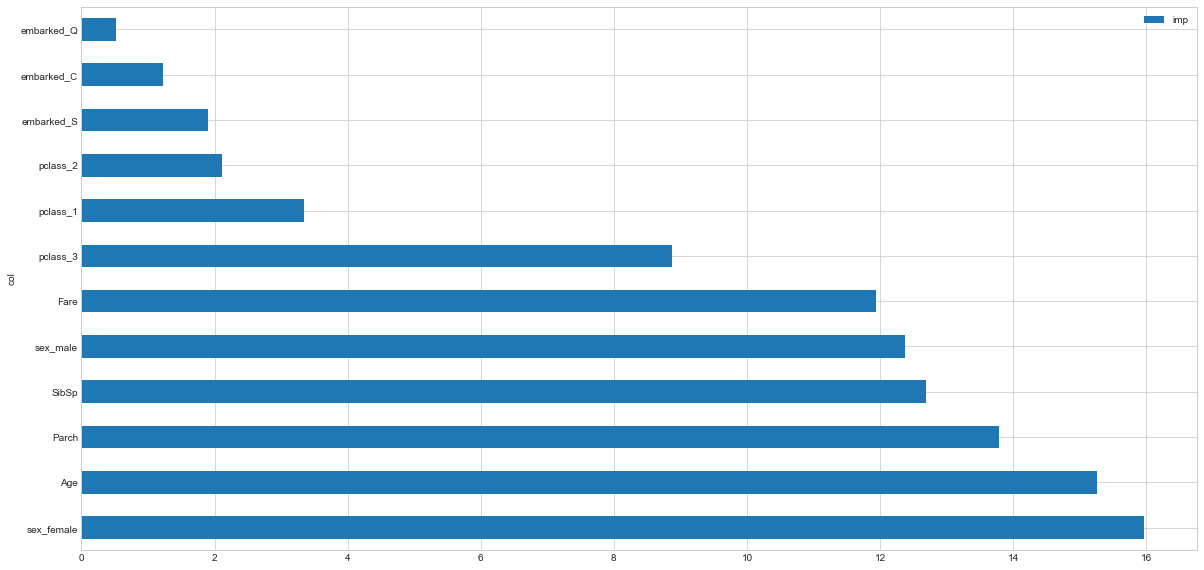

In [127]:
feature_importance(catboost_model, X_train)

### The use of feature importance
1. This shows how much each feature contributed to the module.
2. Using this, we can remove non-important features (ie dimensionality reduction). In this case, we have very little features so its not needed.
3. You can also think of ways to improve the importance of these features. eg. dbourkes age didnt have age, but yours does! And it is one of the most important features. We could try and make changes to the binning of ages!


## Precision and Recall
Metrics used when you have imbalanced classification
eg. If you have 100,000 ppl and only 1 of them gets a certain disease. Our model could just predict everyone doesnt get the disease; accuracy of 99.999% but this doesnt really do anything...

So this is where precision and recall come in.

**Recall** = tp / (tp + fn) = true positive / REAL positive

**Precision** = tp / (tp + fp) = true positive / PREDICTED positive

Combine precision and recall to get the F1 score.

These metrics might not be relevant for this case, but definitely need to know in the future.

### Catboost eval metrics

In [132]:
metrics = ['Precision', 'Recall', 'F1' , 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                               metrics = metrics,
                               plot = True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision 0.8321235655849941
Recall 0.7010558823529411
F1 0.7609685283781985
AUC 0.8934480097503482


In [149]:

for metric in metrics:
    print(str(metric) + " {}".format(np.mean(eval_metrics[metric])))

Precision 0.8321235655849941
Recall 0.7010558823529411
F1 0.7609685283781985
AUC 0.8934480097503482


In [157]:
from catboost.utils import get_confusion_matrix
make_confusion_matrix_table(get_confusion_matrix(catboost_model, train_pool))


,Predicted: 0,Predicted: 1
Acutal: 0,513.0,36.0
Actual: 1,96.0,244.0


### gbt eval metrics: doing this because our model scored higher than catboost

In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
gbt_pred = gbt.predict(X_train)

In [138]:
print(classification_report(y_train , gbt_pred))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.91      0.81      0.86       340

    accuracy                           0.90       889
   macro avg       0.90      0.88      0.89       889
weighted avg       0.90      0.90      0.90       889



In [155]:
def make_confusion_matrix_table(cm_array):
    table = pd.DataFrame(cm_array,
            columns = ['Predicted: 0', 'Predicted: 1'],
            index = ['Acutal: 0', "Actual: 1"])
    return table

In [156]:
make_confusion_matrix_table(confusion_matrix(y_train, gbt_pred))

,Predicted: 0,Predicted: 1
Acutal: 0,521,28
Actual: 1,64,276


### As you can see our metrics are better than the catboost model. This is corroborated by the confusion matrix table!

## Just realized: dbourke didnt use train test split to break this data down...
- Ignore in this case since we understand how to do this.

## Submission
1. Now we need to predict on the test set. But before that, we need to preprocess our test data in such a way that it matches our train data!
2. Then we can model.predict()

In [158]:
X_train

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,35,1,0,53.1000,0,0,1,1,0,1,0,0
4,35,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27,0,0,13.0000,0,0,1,0,1,0,1,0
887,19,0,0,30.0000,0,0,1,1,0,1,0,0
888,30,1,2,23.4500,0,0,1,1,0,0,0,1
889,26,0,0,30.0000,1,0,0,0,1,1,0,0


In [189]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Matching our preprocessing of the df_con data; just replacing it with test data instead

In [190]:
## testing ##
pd.get_dummies(test['Embarked'], # returns a dataframe with readable cols vs an array
    prefix='embarked') 

,embarked_C,embarked_Q,embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [191]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

df_pclass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')


In [192]:
## combine all the new columns to df_con
test_enc = pd.concat([
    test,
    df_embarked_one_hot,
    df_sex_one_hot,
    df_pclass_one_hot,
], axis = 1)

## drop redundant columns
test_enc = test_enc.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)


In [193]:
test_enc.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0,0,0,1


In [194]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,35,1,0,53.1000,0,0,1,1,0,1,0,0
4,35,0,0,8.0500,0,0,1,0,1,0,0,1


### The test data has more columns than the ones we used. We need to cut out the other redundant columns

In [195]:
wanted_columns = list(X_train.columns)

In [196]:
test_enc = test_enc[wanted_columns]
test_enc

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,0,0,8.0500,0,0,1,0,1,0,0,1
414,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,NaN,0,0,8.0500,0,0,1,0,1,0,0,1


In [185]:
test_gbt_pred = gbt.predict(test_enc)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
- This is because the test df has some NaNs. So we actually need to fill up these empty rows ourselves!

<AxesSubplot:>

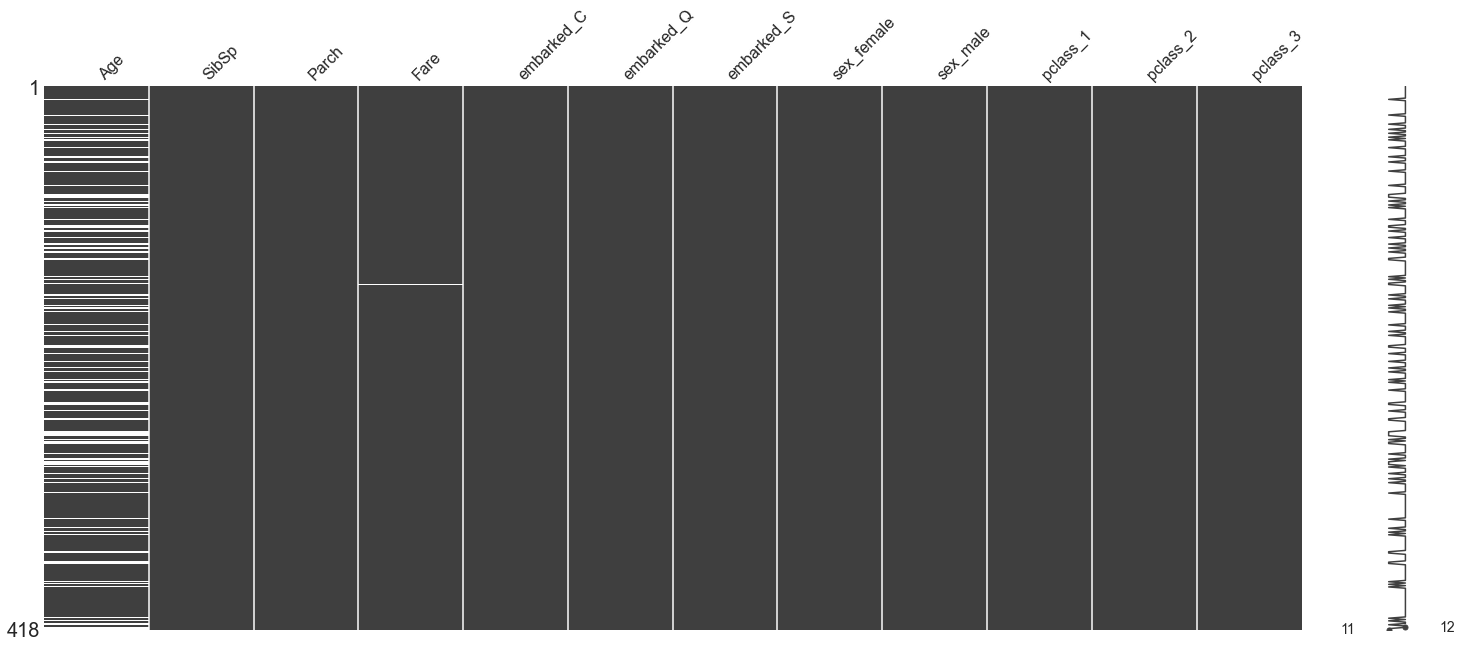

In [202]:
missingno.matrix(test_enc)

In [203]:
test_enc.describe()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
count,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,30.272590,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933,0.363636,0.636364,0.255981,0.222488,0.521531
std,14.181209,0.896760,0.981429,55.907576,0.430019,0.313324,0.478803,0.481622,0.481622,0.436934,0.416416,0.500135
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,39.000000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
test_enc['Age'] = test_enc['Age'].fillna(value= 30)
test_enc.Age.isnull().sum()

0

In [209]:
test_enc

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,0,0,8.0500,0,0,1,0,1,0,0,1
414,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,30.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [214]:
test_enc.describe() # 418 rows, Fare is missing one val!

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
count,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,30.216507,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933,0.363636,0.636364,0.255981,0.222488,0.521531
std,12.635016,0.896760,0.981429,55.907576,0.430019,0.313324,0.478803,0.481622,0.481622,0.436934,0.416416,0.500135
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.750000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
test_enc['Fare'] = test_enc.Fare.fillna(value = '0.392344')

In [217]:
test_gbt_pred = gbt.predict(test_enc)

In [218]:
test_gbt_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [221]:
# looking at the submission to match the output
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [222]:
## Create submission df
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = test_gbt_pred
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [223]:

# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [227]:
submission.to_csv('gbt_submission.csv', index = False)

In [228]:
submission_check = pd.read_csv('gbt_submission.csv')

In [229]:
submission_check

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Kaggle Score: 0.77990, Postion: 9314
- Resubmit here: https://www.kaggle.com/c/titanic/submit

# Possible Extensions
Some reccomendations by DBourke, and my own reflections

1. The Age feature
- All I did was just use the mean() to fill up the age. Just by doing that I was able to get Age to the 2nd highest feature importance.
- DBourke suggest reading up on the interpolate() function of Pandas.
- Another way I saw on Youtube, was to basically use ML model that would fill up the values. An example of this could be kmeans clustering, those with similar attributes could be given similar Ages in this case.

2. What to do with Name.
Initially, i thought we should just remove, the Mr. Mrs etc. But DBourke actually recommends focusing on those! My reasoning for this was that Mr and Mrs are already in Sex.
- But other prefixes could come up: Titles like Dr. etc that might affect how a person is likely to be saved!!

3. Cabin feature
- Is there a way to see if they had a cabin or not? DBourke didnt answer this but i guess using the Pclass? and ticket number?

4. Combine SibSp and Parch to see if the person was alone.
Actually a very good idea which I did think about but never articulated. I would think those that are not alone might actually have less chance of surviving? If you are not alone, one of you is more likely to survive imo.

5. Hyperparameter tuning.
- Dbourke reccomends hyperopt library. We could also use GridSearch and Randomized search iirc.
- https://github.com/hyperopt/hyperopt

6. As we have seen when trying to do the submission, it was actually quite annoying to do all the preprocessing steps again for the test set. Should really consider using the pipeline feature on sklearn.

## Resources reccomended by Dbourke
* [sklearn classification notebook by Daniel Furasso](https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb) - Taking a bigger dataset, cleaning it and performing similar classification from scratch. "Great next step"

* [Encoding categorical features in python blog post by Practical Python Business](https://pbpython.com/categorical-encoding.html) How to deal with categorical features. The site has more info on how to use Python in a business context

* [Catboost Python tutorial on Github](https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb) - the tutorial is based on the Titanic Dataset and has some great tricks on how to improve the catboost results!

* [Sharp library](https://github.com/slundberg/shap) - beautiful alternative to viewing feature importance. Can you use this to improve on the feature importance graphics?


### End :)